<a href="https://colab.research.google.com/github/pnijsters/pytorch/blob/main/Patrick's_notes_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The math behind machine learning

## Single variate linear regression

$
  \begin{align}
    f_{(w,b)}(x) &= wx + b\\
    w &= \text {weight}\\
    b &= \text {bias}
  \end{align}
$

## Cost function

$
  \begin{align}
    J(w,b) &= \frac{1}{2m} \sum_{i=1}^{m} \hat(y^{(i)}-y^{(i)})^2\\
    J(w,b) &= \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)})-y^{(i)})^2\\
    J(w,b) &= \frac{1}{2m} \sum_{i=1}^{m} (wx^{(i)} + b - y^{(i)})^2\\
    m &= \text{number of training samples}
  \end{align}
$

## Gradient descent

$
  \begin{align}
    w &= w -α \frac {\partial }{\partial w}J(w,b)\\
     &= w -α \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)})-y^{(i)}) x^{(i)}\\
    \\
    b &= b -α \frac {\partial}{\partial b}J(w,b)\\
    &= b -α \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)})-y^{(i)})\\
    \\
    & \min_{w,b} J(w,b)
  \end{align}
$

# Patrick's Attempt at Gradient Descent in Python

## Imports and data-set loading from Google Drive

The data set is Medical Costs from Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

Columns in this set (header row has been removed!):
- [0] age
- [1] sex
- [2] bmi
- [3] children
- [4] smoker
- [5] region
- [6] charges

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import csv
from google.colab import drive
drive.mount('/content/drive')

feature_one=np.array([])
target=np.array([])

with open("/content/drive/My Drive/Sample-data/insurance.csv", newline='') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',')
    for row in filereader:
      feature_one = np.append(feature_one, float(row[2]))
      target=np.append(target, float(row[6]))

Mounted at /content/drive


In [ ]:
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost


In [ ]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

Start alpha: 0.001
Start bias: 0
Start weight: 0
Iteration   20 - Cost: 7.22e+07, Cost change: 5.72e-03  dj_dw: -5.960e+04, dj_db: -1.915e+03   w:  3.759e+02, b: 1.18833e+01
Iteration   40 - Cost: 7.04e+07, Cost change: 9.60e-05  dj_dw: -7.601e+03, dj_db: -2.833e+02   w:  4.239e+02, b: 1.34773e+01
Iteration   60 - Cost: 7.04e+07, Cost change: 1.57e-06  dj_dw: -9.684e+02, dj_db: -7.521e+01   w:  4.300e+02, b: 1.37588e+01
Iteration   80 - Cost: 7.04e+07, Cost change: 2.83e-08  dj_dw: -1.223e+02, dj_db: -4.866e+01   w:  4.308e+02, b: 1.38728e+01
Iteration  100 - Cost: 7.04e+07, Cost change: 3.26e-09  dj_dw: -1.437e+01, dj_db: -4.527e+01   w:  4.308e+02, b: 1.39655e+01
Iteration  120 - Cost: 7.04e+07, Cost change: 2.86e-09  dj_dw: -6.080e-01, dj_db: -4.484e+01   w:  4.309e+02, b: 1.40555e+01
Iteration  140 - Cost: 7.04e+07, Cost change: 2.85e-09  dj_dw:  1.148e+00, dj_db: -4.478e+01   w:  4.309e+02, b: 1.41451e+01
Iteration  160 - Cost: 7.04e+07, Cost change: 2.85e-09  dj_dw:  1.372e+00, d

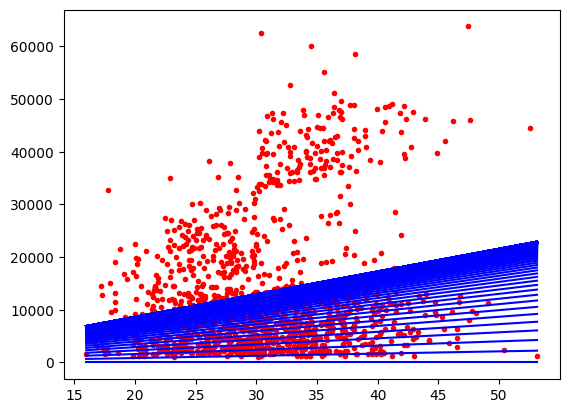

In [ ]:
# start with some random values
bias=random.uniform(-1, 1)      # no need to do random, zero is random as well...
weight=random.uniform(-1, 1)    # same thing, could just start with zero
bias=0
weight=0
alpha=0.001
max_iterations=200
cost=1
print(f"Start alpha: {alpha}")
print(f"Start bias: {bias}")
print(f"Start weight: {weight}")

plt.scatter(feature_one,target,c='r', marker='.')

iteration=0
while (iteration<max_iterations and cost>0):
  # calculate the output and plot
  y_hat=weight * feature_one + bias
  line_x=np.array([np.min(feature_one), np.max(feature_one)])
  line_y=np.array([y_hat[np.argmin(feature_one)],y_hat[np.argmax(feature_one)]])
  plt.plot(line_x,line_y,c='b')

  cost_new=compute_cost(feature_one, target, weight, bias)
  if cost_new>cost: # we're diverging because alpha is too large
    alpha=alpha/10

  percent=(cost-cost_new)/cost
  cost=cost_new

  # calculate new weight and bias
  dw,db = compute_gradient(feature_one, target, weight, bias)
  weight=weight - alpha * dw
  bias=bias - alpha * db
  iteration+=1

  if iteration% math.ceil(max_iterations/10) == 0:
    print(f"Iteration {iteration:4} - Cost: {cost_new:0.2e}, Cost change: {percent:0.2e} ",f"dj_dw: {dw: 0.3e}, dj_db: {db: 0.3e}  ",f"w: {weight: 0.3e}, b:{bias: 0.5e}")


print(f"\nNumber of iterations: {iteration}")
print(f"Final cost: {cost}")
print(f"Final alpha: {alpha}")
print(f"Final bias: {bias}")
print(f"Final weight: {weight}")

# Vectorization



## Dot product definition
The dot product multiplies the values in two vectors element-wise and then sums the result.

$
  \begin{align}
    \vec a \cdot \vec b &= \sum_{i=1}^n a_ib_i = \begin{bmatrix} a_1 \\ a_2\\ \vdots\\ a_n \end{bmatrix} \cdot \begin{bmatrix} b_1 \\ b_2\\ \vdots\\ b_n \end{bmatrix} = a_1b_1 + a_2b_2 + \dots + a_nb_n
  \end{align}
$


## Multiple variable linear regression

$
  \begin{align}
  f_{(w,b)}(x) &= w_1x_1 + w_2x_2 + ... + w_nx_n + b\\
  \\
  \vec x &= [ x_1, x_2, ..., x_n]\\
  \vec w &= [ w_1, w_2, ..., w_n]\\
  \\
  f_{\vec w,b}(\vec x) &= \vec w \cdot \vec x +b\\
  \\
  x_j &= j^{th} \text { feature}\\
  n &= \text {number of features}\\
  m &= \text {number of training examples}\\
  \vec x^{(i)} &= \text {features of } i^{th} \text { training example}
  \end{align}
$

## Multivariate gradient descent

### Cost function

$
  \begin{align}
  J(\vec w,b) &= \frac{1}{2m} \sum_{i=1}^{m} \hat(y^{(i)}- y^{(i)})^2\\
  J(\vec w,b) &= \frac{1}{2m} \sum_{i=1}^{m} (f_{\vec w,b}(\vec x^{(i)})- y^{(i)})^2\\
  J(\vec w,b) &= \frac{1}{2m} \sum_{i=1}^{m} (\vec w \cdot \vec x^{(i)} + b -  y^{(i)})^2\\
  \end{align}
$


### Gradient descent function

$
  \begin{align}
  \vec w &= \vec w -α \frac {\partial }{\partial \vec w}J(\vec w,b)\\
  \vec w &= \vec w - α \frac{1}{m} \sum_{i=1}^{m} (f_{\vec w,b}(\vec x^{(i)}) - y^{(i)}) \vec x^{(i)}\\
  w_n &= w_n - α \frac{1}{m} \sum_{i=1}^{m} (f_{\vec w,b}(\vec x^{(i)}) - y^{(i)}) x_n^{(i)}\\
  b &= b -α \frac {\partial}{\partial b}J(\vec w,b)\\
  b &= b - α \frac{1}{m} \sum_{i=1}^{m} (f_{\vec w,b}(\vec x^{(i)}) - y^{(i)}) \\
  & \min_{\vec w,b} J(\vec w,b)
  \end{align}
$

## Notation

|General <br />  Notation  | Description| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                 ||
| $\mathbf{A}$ | matrix, bold capital                                         ||
| **Regression** |         |    |     |
|  $\mathbf{X}$ | training example maxtrix                  | `X_train` |   
|  $\mathbf{y}$  | training example  targets                | `y_train`
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `X[i]`, `y[i]`|
| m | number of training examples | `m`|
| n | number of features in each example | `n`|
|  $\mathbf{w}$  |  parameter: weight,                       | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | The result of the model evaluation at  $\mathbf{x}^{(i)}$ parameterized by $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` |
|$\frac{\partial J(\mathbf{w},b)}{\partial w_j}$| the gradient or partial derivative of cost with respect to a parameter $w_j$ |`dj_dw[j]`|
|$\frac{\partial J(\mathbf{w},b)}{\partial b}$| the gradient or partial derivative of cost with respect to a parameter $b$| `dj_db`|

# Patrick's Attempt at *Multivariable* Gradient Descent in Python

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def calculate_cost(x,y,w,b,l):
  m = x.shape[0]
  n = x.shape[1]
  normal_cost = 0.
  regularization_cost = 0.

  for i in range(m):
    normal_cost=normal_cost+(np.dot(w,x[i])+b-y[i])**2

  for j in range (n):
    regularization_cost = regularization_cost +  (w[j]**2)

  cost = (normal_cost/(2*m)) + ((l/(2*m))*regularization_cost)
  return cost

In [ ]:
def calculate_gradient(X,y,w,b,l):
  m = X.shape[0] # number of samples
  n = X.shape[1] # number of features
  # m,n = X.shape delivers the same result

  dj_dw = np.zeros((n,))
  dj_db = 0.

  for i in range(m):
    err=np.dot(w,X[i])+b-y[i]
    dj_dw=dj_dw+err*X[i]
    dj_db=dj_db+err

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  for j in range(n):
    dj_dw[j] = dj_dw[j] + (l/m)*w[j]

  return dj_dw, dj_db

In [ ]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_dw_tmp, dj_db_tmp =  calculate_gradient(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]


CONVERGED
Iteration  100 - Cost: 696.9729495577458, Cost change: 1.55e-06 
Iteration  200 - Cost: 696.864703745206, Cost change: 1.55e-06 
Iteration  300 - Cost: 696.7565535157987, Cost change: 1.55e-06 
Iteration  400 - Cost: 696.6484982130877, Cost change: 1.55e-06 
Iteration  500 - Cost: 696.5405377526931, Cost change: 1.55e-06 
Iteration  600 - Cost: 696.4326720503118, Cost change: 1.55e-06 
Iteration  700 - Cost: 696.3249010217088, Cost change: 1.55e-06 
Iteration  800 - Cost: 696.2172245827318, Cost change: 1.55e-06 
Iteration  900 - Cost: 696.1096426492999, Cost change: 1.54e-06 
Iteration 1000 - Cost: 696.0021551374048, Cost change: 1.54e-06 

Number of iterations: 1000
Final cost: 696.0021551374048
Final alpha: 5e-08
Final bias: -0.00011745078635811138
Final weight: [ 0.20234987  0.00079466 -0.00098509 -0.00212496]

Predictions
i: 0, prediction: 425.65137629605977, actual: 460
i: 1, prediction: 286.4427153646424, actual: 232
i: 2, prediction: 172.3282033003085, actual: 178


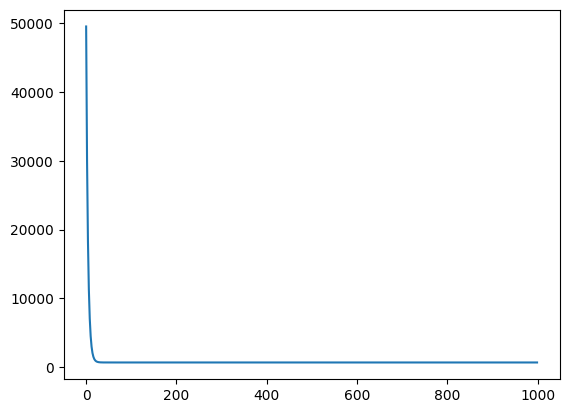

In [ ]:
X_train=np.array([[2104,5,1,45],[1416,3,2,40],[852,2,1,35]])
y_train=np.array([460,232,178])
weight=np.zeros((4))
bias=0.
lamb=0.
alpha=5.0e-7  # learning rate
epsilon=0.001 # automatic convergence
max_iterations=1000
learning_curve=np.zeros((max_iterations))
cost=1.
iteration=0

while (iteration<max_iterations and cost>0):
  # calculate the cost
  cost_new = calculate_cost(X_train, y_train, weight, bias, lamb)
  if cost_new > cost: # we're diverging because alpha is too large
    alpha=alpha/10

  percent=(cost-cost_new)/cost
  if (cost - cost_new) < epsilon:
    print("CONVERGED")
  cost=cost_new
  learning_curve[iteration]=cost

  # calculate gradient descent and new better (?) values for w and b
  dj_dw, dj_db = calculate_gradient(X_train, y_train, weight, bias, lamb)
  weight = weight - alpha * dj_dw
  bias = bias - alpha * dj_db
  iteration+=1

  if iteration% math.ceil(max_iterations/10) == 0:
    print(f"Iteration {iteration:4} - Cost: {cost_new}, Cost change: {percent:0.2e} ")


print(f"\nNumber of iterations: {iteration}")
print(f"Final cost: {cost}")
print(f"Final alpha: {alpha}")
print(f"Final bias: {bias}")
print(f"Final weight: {weight}")

print("\nPredictions")

for i in range(X_train.shape[0]):
  value = np.dot(weight,X_train[i])+bias
  print(f"i: {i}, prediction: {value}, actual: {y_train[i]}")

plt.plot(learning_curve)

# Feature scaling

This deals with different features having different ranges of absolute values and features with large absolute value ranges drown out the effect of features with smaller ranges. I.e. the 'sensitivity' of a feature needs to be normalized to have comparable ranges for all features. The order of magnitude of all features should be similar: target range is -1 to 1 (but focus on all features being the same order of magnitude).

**This is a standard way for preparing and polishing input data before model training. Plenty of different "scalers" exist but the most common ones are pretty straightforward.**


Three typical ways of doing this normalization:
1. Maximum based (sklearn: MixMaxScaler or MaxAbsScaler)
$
  \begin{align}
    x_{normalized} &= \frac {x - x_{min} }{x_{max} - x_{min}}
  \end{align}
$
2. Mean based
$
  \begin{align}
    x_{normalized} &= \frac {x - μ}{x_{max} - x_{min}}
  \end{align}
$
3. Z-score based (sklearn: StandardScaler)
$
  \begin{align}
    x_{normalized} &= \frac {x - μ }{σ}
  \end{align}
$

$
  \begin{align}
    \mu &= \text{mean = average} = \frac {1}{m} \sum_{i=0}^{m-1}x^{(i)}\\
    \sigma &= \text{standard deviation} =  \sqrt{\frac {1}{m} \sum_{i=0}^{m-1}(x^{(i)} - \mu)^2}
  \end{align}
$

## Feature engineering

Creating new features (input parameters) from existing features based on knowledge and intuition. Like in the home example: two features width and depth of lot exist, but probably better would be to use lot size which is equal to lot depth times lot width.

Feature engineering is also how to add non-linear functions to linear regression (oddly enough). Basically create new features with non-linear functions of an existing feature.

Example: we have existing feature x which is trying to fit a non-linear target. We can create new features like x^2 and x^3 and add run them through the linear regression gradient descent approach. The algorithm will come up with weights that emphasic the features that drive a close match whereas non-relevant features will go to very small or zero values.

# Classification with logistic regression

Decision boundary


## Sigmoid function

Also known as the logistic function: indicates the 'probability' that the class is '1' for a given x with parameters w and b

$
  \begin{align}
    g(z) &= \frac {1}{1+e^{-z}}\\ \\
    z &= \vec w \cdot \vec x + b \\ \\
    f_{\vec w, b} &= g(\vec w \cdot \vec x + b)\\ \\
    f_{\vec w,b}(\vec x) &= \frac {1} {1 + e^{-(\vec w \cdot \vec x + b)}}\\ \\
    &= P(y = 1|x; \vec w, b)
  \end{align}
$

## Decision boundary

The typical decision boundary is where the output of the sigmoid function is 0.5 since this coincides with z = 0. Meaning, that any output of the sigmoid function greater than or equal to 0.5 indicates a 'positive' where every value smaller than 0.5 indicates a 'negative'.

$
  \begin{align}
    \frac {1}{1+e^{-z}} &= \frac {1}{2}\\ \\
    1+e^{-z} &= 2\\ \\
    e^{-z} &= 1\\ \\
    z &= 0
  \end{align}
$

The decision boundary is the function where the linear regression function is zero

$
  \begin{align}
    z &= \vec w \cdot \vec x + b = 0
  \end{align}
$

## Cost function for logistic regression

The squared error cost function as used for linear regression isn't very well suited for logistic regression. In linear regression, the squared error cost function is convex and gradient descent works very well to find a global minimum. However, for logistic regression, the cost function would be non-convex which doesnt work well with gradient descent because of the many local minima.

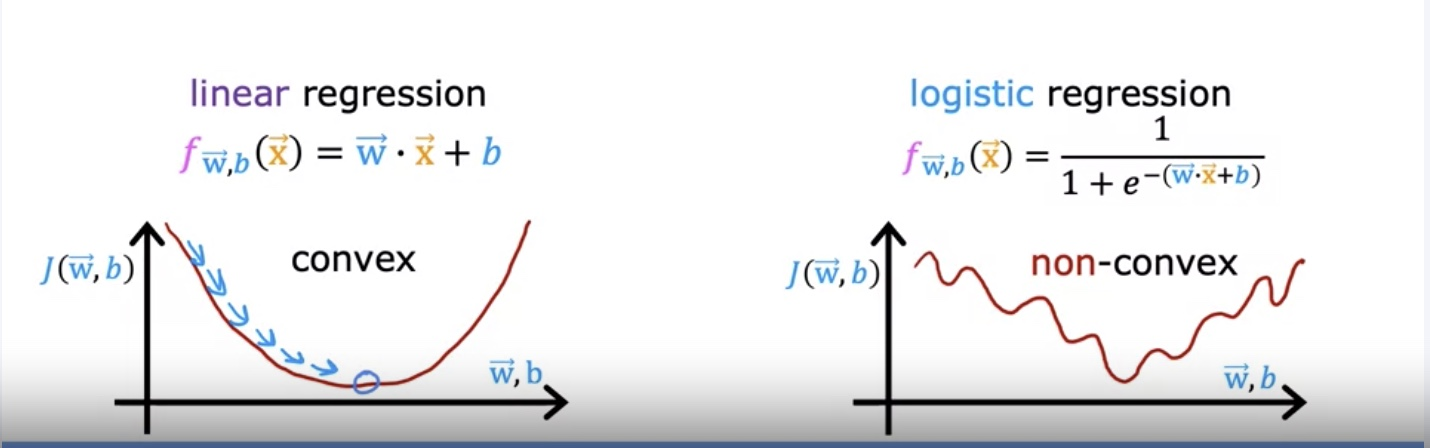

### Cost function for logistic regression

Thus function was chosen because of a statistical principle called "maximum likelihood". This cost function is convex and thus has a single global minimum.

$
  \begin{align}
    L(f_{\vec w,b}(\vec x^{(i)}),y^{(i)}) &=
    \begin{cases}
    \vert y^{(i)} = 1 \rangle -log(f_{\vec w,b}(\vec x^{(i)})) \\ \\
    \vert y^{(i)} = 0 \rangle -log(1 - f_{\vec w, b}(\vec x^{(i)}))
    \end{cases}\\ \\
    &= (-y^{(i)}log(f_{\vec w,b}(\vec x^{(i)})) - (1 - y^{(i)})log(1 - f_{\vec w,b}(x^{(i)}) )\\ \\
    J(\vec w,b) &= \frac {1}{m} \sum_{i=1}{L(f_{\vec w,b)}(\vec x^{(i)},y^{(i)})}\\ \\
    f_{\vec w,b}(\vec x^{(i)}) &= g(\vec w \cdot \vec x^{(i)} + b)\\ \\
    L(f_{\vec w,b}(\vec x^{(i)}),y^{(i)}) &=
    \begin{cases}
    \vert y^{(i)} = 1 \rangle -log(\frac {1} {1 + e^{-(\vec w \cdot \vec x^{(i)} + b)}}) \\ \\
    \vert y^{(i)} = 0 \rangle -log(1 - \frac {1} {1 + e^{-(\vec w \cdot \vec x^{(i)} + b)}})
    \end{cases}\\ \\
    &= (-y^{(i)}log(\frac {1} {1 + e^{-(\vec w \cdot \vec x^{(i)} + b)}}) - (1 - y^{(i)})log(1 - \frac {1} {1 + e^{-(\vec w \cdot \vec x^{(i)} + b)}})\\ \\
    J(\vec w,b) &= -\frac {1}{m} \sum_{i=1}^{m} \left[ y^{(i)}log(\frac {1} {1 + e^{-(\vec w \cdot \vec x^{(i)} + b)}}) + (1 - y^{(i)})log(1 - \frac {1} {1 + e^{-(\vec w \cdot \vec x^{(i)} + b)}}) \right]\\ \\
  \end{align}
$

# Patrick's Attempt at Logistic Regression with Regularization in Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def calculate_cost_logistic(x,y,w,b,l):
  m,n = x.shape
  normal_cost = 0
  regularization_cost = 0

  f_wb = 0

  for i in range(m):
    f_wb = 1 / (1 + math.exp(-(np.dot(w, x[i]) + b)))
    normal_cost = normal_cost + y[i] * math.log(f_wb) + (1-y[i])*math.log(1-f_wb)

  for j in range (n):
    regularization_cost = regularization_cost +  (w[j]**2)

  total_cost = (-normal_cost / m) + ((l/(2*m))*regularization_cost)
  return total_cost


In [ ]:
def compute_gradient_logistic(x,y,w,b,l):
  m,n = x.shape
  dj_dw = np.zeros(n)
  dj_db = 0.
  f_wb=0.

  for i in range(m):
    err = (1 / (1 + math.exp(-(np.dot(w, x[i]) + b)))) - y[i]
    dj_dw = dj_dw + err* x[i]
    dj_db = dj_db + err

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  for j in range(n):
    dj_dw[j] = dj_dw[j] + (l/m)*w[j]

  return dj_dw, dj_db

In [ ]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_dw_tmp, dj_db_tmp =  compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]


In [ ]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
m,n = X_train.shape
bias = 0.
weight = np.array([0.,0.])
alpha = 0.1
epsilon = 0.001
lamb = 0.
max_iterations = 10000
iteration = 0
cost = 10.
cost_new = 0.
percent = 0.
dw = 0.
db = 0.

while (iteration<max_iterations and cost>0):
  cost_new = calculate_cost_logistic(X_train, y_train, weight, bias, lamb)
  if cost_new > cost: # we're diverging because alpha is too large
    alpha=alpha/10

  percent=(cost-cost_new)/cost
  cost=cost_new

  dw, db = compute_gradient_logistic(X_train, y_train, weight, bias, lamb)
  weight = weight - alpha * dw
  bias = bias - alpha * db

  iteration+= 1
  if iteration% math.ceil(max_iterations/10) == 0:
    print(f"Iteration {iteration:4} - Cost: {cost_new}, Cost change: {percent:0.2e} ")

print(f"\nNumber of iterations: {iteration}")
print(f"Final cost: {cost}")
print(f"Final alpha: {alpha}")
print(f"Final bias: {bias}")
print(f"Final weight: {weight}")

print("\nPredictions")

for i in range(X_train.shape[0]):
  value = 1 / (1 + math.exp(-1 * (np.dot(weight,X_train[i])+bias)))
  print(f"i: {i}, prediction: {value}, actual: {y_train[i]}")


Iteration 1000 - Cost: 0.1593695816028526, Cost change: 8.54e-04 
Iteration 2000 - Cost: 0.08468158633967093, Cost change: 4.78e-04 
Iteration 3000 - Cost: 0.05709073787776018, Cost change: 3.28e-04 
Iteration 4000 - Cost: 0.042928963305127764, Cost change: 2.49e-04 
Iteration 5000 - Cost: 0.034352228947142655, Cost change: 2.00e-04 
Iteration 6000 - Cost: 0.028613368777091617, Cost change: 1.67e-04 
Iteration 7000 - Cost: 0.024508606272577657, Cost change: 1.44e-04 
Iteration 8000 - Cost: 0.02142909086988386, Cost change: 1.26e-04 
Iteration 9000 - Cost: 0.019034392545152375, Cost change: 1.12e-04 
Iteration 10000 - Cost: 0.01711949164717537, Cost change: 1.01e-04 

Number of iterations: 10000
Final cost: 0.01711949164717537
Final alpha: 0.1
Final bias: -14.222409982019837
Final weight: [5.28123029 5.07815608]

Predictions
i: 0, prediction: 0.018622974196496927, actual: 0
i: 1, prediction: 0.02057228580852861, actual: 0
i: 2, prediction: 0.022720912637849727, actual: 0
i: 3, predictio

## Gradient descent for logistic regression

Turns out this is the same as for linear regression (TODO: figure out the linear algebra to proof this out). The only difference is that f_wb is different between both (sigmoid in logistic regression).

$
  \begin{align}
    w &= w_j -α \frac {\partial }{\partial w_j}J(\vec w,b)\\
     &= w -α \frac{1}{m} \sum_{i=1}^{m} (f_{\vec w,b}(x^{(i)})-y^{(i)}) x_j^{(i)}\\
    \\
    b &= b -α \frac {\partial}{\partial b}J(\vec w,b)\\
    &= b -α \frac{1}{m} \sum_{i=1}^{m} (f_{\vec w,b}(x^{(i)})-y^{(i)})\\
    \\
    & \min_{w,b} J(w,b)\\
    f_{\vec w,b}(\vec x) &= \frac {1} {1 + e^{-(\vec w \cdot \vec x + b)}}\\ \\
  \end{align}
$

# Overfitting

- overfitting is also known as 'high variance'
- underfitting is also known as 'high bias'
- 'just right' fitting is called 'generalization' since the model now generalizes very well to values it hasnt seen before

Solve overfitting:
- get more training data if possible
- select features to include or exclude
- regularization to reduce the size of parameters

Many features and little data is a recipe for overfitting. Need to strike a balance with 'feature selection'

## Cost function with regularization

Basically add the parameters to the cost function that you want to minimize. For example w3 should be minimized by adding 1000 x w3^2 to the cost function. However, in large models it is unknown which features should be minimized so regularlization starts off by penalizing ALL features.

$
  \begin{align}
    J(w,b) &= \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)})-y^{(i)})^2 + \frac {λ}{2m} \sum_{j=1}^{n}w_j^2\\ \\
    m &= \text{number of training samples} \\
    n &= \text{number of features}\\
    λ &= \text{regularization parameter } (\lambda > 0)
  \end{align}
$

$
  \begin{align}
    w_j &= w_j -α \frac {\partial }{\partial w_j}J(\vec w,b)\\ \\
     &= w_j -α \left[ \frac{1}{m} \sum_{i=1}^{m} \left[ (f_{\vec w,b}(x^{(i)})-y^{(i)}) x_j^{(i)} \right] + \frac{λ}{m} w_j \right]\\
    \\
    &= w_j \left(1 - α \frac{λ}{m} \right) - \alpha \frac{1}{m} \sum_{i=1}^{m} ( f_{\vec w,b}(x^{(i)}) - y^{(i)}) x_j^{(i)} \\
    \\
    b &= b -α \frac {\partial}{\partial b}J(\vec w,b)\\ \\
    &= b -α \frac{1}{m} \sum_{i=1}^{m} (f_{\vec w,b}(x^{(i)})-y^{(i)})\\
    \\
    & \min_{w,b} J(w,b)\\
  \end{align}
$